<a href="https://colab.research.google.com/github/SMN-SENAMHI/ADAPTACION/blob/main/era5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade xarray zarr gcsfs fsspec



In [ ]:
import xarray as xr

google_store_url = 'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3'

ar_full_37_1h = xr.open_zarr(
    google_store_url,
    chunks=None,
    storage_options={'token': 'anon'},
)

ar_full_37_1h



<xarray.Dataset> Size: 4PB
Dimensions:                                                          (
                                                                      time: 1323648,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * time                                                             (time) datetime64[ns] 11MB ...
  * latitude                                                         (latitude) float32 3kB ...
  * longitude                                                        (longitude) float32 6kB ...
  * level                                                            (level) int64 296B ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 5TB ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 5TB ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 5TB ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 5TB ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 5TB ...
    zero_degree_level                                                (time, latitude, longitude) float32 5TB ...
Attributes:
    last_updated:           2025-11-05 01:44:53.003164+00:00
    valid_time_start:       1940-01-01
    valid_time_stop:        2025-04-30
    valid_time_stop_era5t:  2025-10-30

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# ============================================================
# Lectura del conjunto de datos ERA5 en formato Zarr
# ============================================================
google_store_url = (
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3'
)

ar_full_37_1h = xr.open_zarr(
    google_store_url,
    chunks=None,
    storage_options=dict(token='anon'),
)

# Mostrar información general del dataset
ar_full_37_1h


<xarray.Dataset> Size: 4PB
Dimensions:                                                          (
                                                                      time: 1323648,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * time                                                             (time) datetime64[ns] 11MB ...
  * latitude                                                         (latitude) float32 3kB ...
  * longitude                                                        (longitude) float32 6kB ...
  * level                                                            (level) int64 296B ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 5TB ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 5TB ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 5TB ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 5TB ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 5TB ...
    zero_degree_level                                                (time, latitude, longitude) float32 5TB ...
Attributes:
    last_updated:           2025-11-05 01:44:53.003164+00:00
    valid_time_start:       1940-01-01
    valid_time_stop:        2025-04-30
    valid_time_stop_era5t:  2025-10-30

In [ ]:
# Ver el tipo de estructura que contiene las variables
type(ar_full_37_1h.data_vars)

xarray.core.dataset_variables.DataVariables

In [ ]:
# Listar todas las variables disponibles en el dataset
list(ar_full_37_1h.data_vars)



['100m_u_component_of_wind',
 '100m_v_component_of_wind',
 '10m_u_component_of_neutral_wind',
 '10m_u_component_of_wind',
 '10m_v_component_of_neutral_wind',
 '10m_v_component_of_wind',
 '10m_wind_gust_since_previous_post_processing',
 '2m_dewpoint_temperature',
 '2m_temperature',
 'air_density_over_the_oceans',
 'angle_of_sub_gridscale_orography',
 'anisotropy_of_sub_gridscale_orography',
 'benjamin_feir_index',
 'boundary_layer_dissipation',
 'boundary_layer_height',
 'charnock',
 'clear_sky_direct_solar_radiation_at_surface',
 'cloud_base_height',
 'coefficient_of_drag_with_waves',
 'convective_available_potential_energy',
 'convective_inhibition',
 'convective_precipitation',
 'convective_rain_rate',
 'convective_snowfall',
 'convective_snowfall_rate_water_equivalent',
 'downward_uv_radiation_at_the_surface',
 'duct_base_height',
 'eastward_gravity_wave_surface_stress',
 'eastward_turbulent_surface_stress',
 'evaporation',
 'forecast_albedo',
 'forecast_logarithm_of_surface_roughne

In [ ]:
# Buscar variables específicas que contengan una palabra clave (por ejemplo, 'geopotential')
for var in list(ar_full_37_1h.data_vars):
    if 'geopotential' in var:
        print(var)

geopotential
geopotential_at_surface
vertical_integral_of_divergence_of_geopotential_flux
vertical_integral_of_eastward_geopotential_flux
vertical_integral_of_northward_geopotential_flux


In [ ]:
from datetime import datetime

data = ar_full_37_1h.sel(
    latitude=slice(-30, -35),
    longitude=slice(360 - 73, 360 - 69),
    time=datetime(1940, 6, 1)
)

data


<xarray.Dataset> Size: 956kB
Dimensions:                                                          (
                                                                      latitude: 21,
                                                                      longitude: 17,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 84B ...
  * longitude                                                        (longitude) float32 68B ...
  * level                                                            (level) int64 296B ...
    time                                                             datetime64[ns] 8B ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (latitude, longitude) float32 1kB ...
    100m_v_component_of_wind                                         (latitude, longitude) float32 1kB ...
    10m_u_component_of_neutral_wind                                  (latitude, longitude) float32 1kB ...
    10m_u_component_of_wind                                          (latitude, longitude) float32 1kB ...
    10m_v_component_of_neutral_wind                                  (latitude, longitude) float32 1kB ...
    10m_v_component_of_wind                                          (latitude, longitude) float32 1kB ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (latitude, longitude) float32 1kB ...
    wave_spectral_directional_width_for_wind_waves                   (latitude, longitude) float32 1kB ...
    wave_spectral_kurtosis                                           (latitude, longitude) float32 1kB ...
    wave_spectral_peakedness                                         (latitude, longitude) float32 1kB ...
    wave_spectral_skewness                                           (latitude, longitude) float32 1kB ...
    zero_degree_level                                                (latitude, longitude) float32 1kB ...
Attributes:
    last_updated:           2025-11-05 01:44:53.003164+00:00
    valid_time_start:       1940-01-01
    valid_time_stop:        2025-04-30
    valid_time_stop_era5t:  2025-10-30

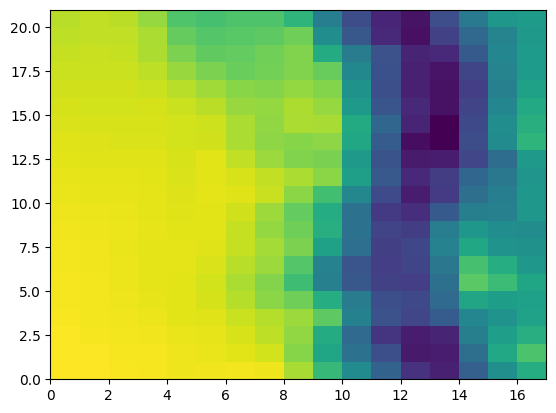

In [ ]:
import matplotlib.pyplot as plt

# --- Figura simple sin barra de color
fig, ax = plt.subplots()
ax.pcolormesh(data['2m_temperature'])



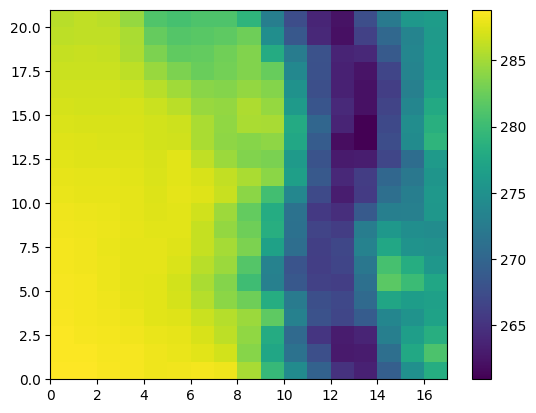

In [ ]:
# --- Figura con barra de color
fig, ax = plt.subplots()
h = ax.pcolormesh(data['2m_temperature'])
plt.colorbar(h)
plt.show()

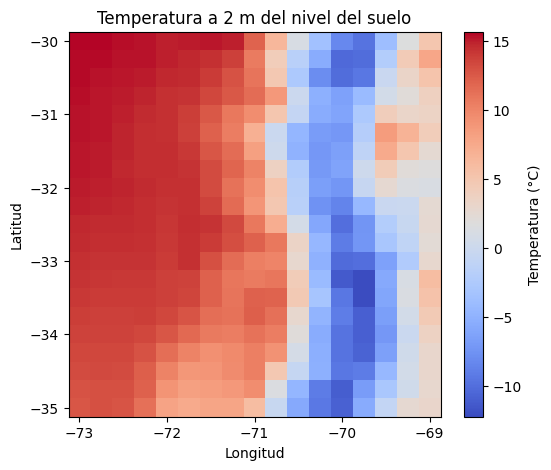

In [ ]:
import matplotlib.pyplot as plt

# --- Conversión de temperatura a °C ---
valores = data['2m_temperature'] - 273.15  # de Kelvin a Celsius

# --- Ajuste de coordenadas ---
X = data['longitude'] - 360  # convierte de 0–360° a -180–180° (oeste)
Y = data['latitude']

# --- Gráfico básico ---
fig, ax = plt.subplots(figsize=(6, 5))
h = ax.pcolormesh(X, Y, valores, cmap='coolwarm')
plt.colorbar(h, ax=ax, label='Temperatura (°C)')
plt.title('Temperatura a 2 m del nivel del suelo')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


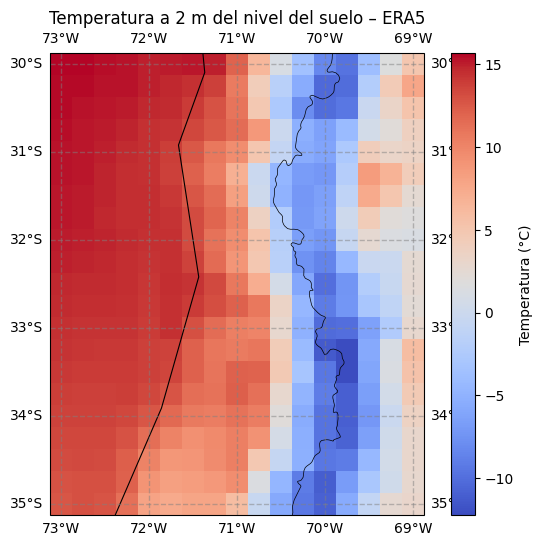

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Definimos la proyección ---
proj = ccrs.PlateCarree()

# --- Preparamos la figura y el eje ---
fig, ax = plt.subplots(subplot_kw={'projection': proj}, figsize=(7, 6))

# --- Conversión de temperatura a °C ---
valores = data['2m_temperature'] - 273.15
X = data['longitude'] - 360
Y = data['latitude']

# --- Dibujamos el mapa ---
h = ax.pcolormesh(X, Y, valores, cmap='coolwarm', transform=ccrs.PlateCarree())

# --- Barra de color ---
plt.colorbar(h, ax=ax, label='Temperatura (°C)')

# --- Elementos geográficos ---
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.coastlines(resolution='110m', linewidth=0.8)

# --- Cuadrícula con etiquetas ---
ax.gridlines(
    draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--'
)

# --- Título ---
plt.title('Temperatura a 2 m del nivel del suelo – ERA5')
plt.show()


In [ ]:
from datetime import datetime

# --- Selección para un solo día ---
data = ar_full_37_1h['2m_temperature'].sel(
    latitude=slice(-30, -35),
    longitude=slice(360 - 73, 360 - 69),
    time=datetime(1940, 6, 1)
)

data

# --- Guardar en archivo NetCDF ---
data.to_netcdf('era5_2m_temperature.nc')


In [ ]:
data = ar_full_37_1h['2m_temperature'].sel(
    latitude=slice(-30, -35),
    longitude=slice(360 - 73, 360 - 69),
    time=slice(datetime(1940, 6, 1), datetime(1940, 6, 14))
)

data

# --- Guardar en archivo NetCDF ---
data.to_netcdf('era5_2m_temperature_2week.nc')
